In [1]:
%pylab inline

import pandas as pd
import glob
import os

import numpy as np
import pandas as pd

import trackpy as tp
from copy import deepcopy
import pyproj

import xarray as xr
import cartopy.crs as ccrs
import seaborn as sns


dem_files = sorted(glob.glob('/data/accp/a/snesbitt/relampago/srtm/*.tif'))

ds_list = []
for file in dem_files:
    ds_list.append(xr.open_rasterio(file).isel(band=0))



%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/tmp/ipykernel_171454/3465063834.py:23: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  ds_list.append(xr.open_rasterio(file).isel(band=0))


In [2]:
df = pd.concat([pd.read_csv(f) for f in sorted(glob.glob('/data/keeling/a/melinda3/NASA/*_filtered.csv'))], ignore_index = True)

In [3]:
df

,Unnamed: 0,time,lat,lon,lat_corr,lon_corr,otid,mintb,tropopause_height,tropopause_temperature,...,n2,trop_height,w,mucape,trop_pt,trop_pv,trop_hypso,trop_temp_lowest,trop_temp_pt,trop_temp_pv
0,0,2018-12-01 00:05:24.999999488,-33.133926,-63.312500,-33.039925,-63.348500,42.0,211.39000,12.084001,216.43000,...,0.000355,11.982890,56.546314,1598.742807,19306.259907,19317.274301,12047.698131,-56.413795,-56.413795,-56.413795
1,1,2018-12-01 00:06:25.000000512,-33.133926,-63.294640,-33.038925,-63.330640,42.0,210.50000,12.079000,216.45000,...,0.000354,11.980593,56.429063,1592.119573,19324.491564,19315.721608,12047.776116,-56.393803,-56.393803,-56.393803
2,2,2018-12-01 00:07:25.000000512,-33.133926,-63.294640,-33.037926,-63.330640,48.0,210.01999,12.083000,216.44000,...,0.000354,11.980593,56.429063,1592.119573,19324.491564,19315.721608,12047.776116,-56.393803,-56.393803,-56.393803
3,3,2018-12-01 00:08:25.000000512,-33.133926,-63.294640,-33.038925,-63.330640,48.0,210.53000,12.080001,216.44000,...,0.000354,11.980593,56.429063,1592.119573,19324.491564,19315.721608,12047.776116,-56.393803,-56.393803,-56.393803
4,4,2018-12-01 00:09:25.000000512,-33.133926,-63.294640,-33.038925,-63.330640,49.0,211.23000,12.079000,216.45000,...,0.000354,11.980593,56.429063,1592.119573,19324.491564,19315.721608,12047.776116,-56.393803,-56.393803,-56.393803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31931,122,2018-11-30 23:29:25.000000512,-32.955357,-65.116070,-32.861355,-65.146070,32.0,210.45000,12.180000,215.25000,...,-9999.000000,-9999.000000,NaN,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
31932,123,2018-11-30 23:30:25.000000512,-32.955357,-65.098210,-32.862360,-65.128210,36.0,210.65000,12.180000,215.25000,...,-9999.000000,-9999.000000,NaN,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
31933,124,2018-11-30 23:34:25.000000512,-33.526787,-60.312496,-33.431786,-60.356495,48.0,213.40999,11.417001,219.14000,...,0.000326,10.986634,44.449796,987.892184,9639.500470,22658.696991,11126.088388,-52.445376,-64.299243,-52.445376
31934,125,2018-11-30 23:35:25.000000512,-33.526787,-60.294643,-33.431786,-60.338642,44.0,213.12999,11.412001,219.15999,...,0.000327,10.987098,44.397550,985.571221,9606.302564,22657.036932,11127.516191,-52.435827,-64.308135,-52.435827


In [6]:
df = df[df.area_polygon > 4 ]
df = df[df.lapse_rate > -9999]
df = df[df.n2 > -9999]
#df= df[df.ot_depth < 7]


In [7]:
df

,Unnamed: 0,time,lat,lon,lat_corr,lon_corr,otid,mintb,tropopause_height,tropopause_temperature,...,n2,trop_height,w,mucape,trop_pt,trop_pv,trop_hypso,trop_temp_lowest,trop_temp_pt,trop_temp_pv
0,0,2018-12-01 00:05:24.999999488,-33.133926,-63.312500,-33.039925,-63.348500,42.0,211.39000,12.084001,216.43000,...,0.000355,11.982890,56.546314,1598.742807,19306.259907,19317.274301,12047.698131,-56.413795,-56.413795,-56.413795
1,1,2018-12-01 00:06:25.000000512,-33.133926,-63.294640,-33.038925,-63.330640,42.0,210.50000,12.079000,216.45000,...,0.000354,11.980593,56.429063,1592.119573,19324.491564,19315.721608,12047.776116,-56.393803,-56.393803,-56.393803
2,2,2018-12-01 00:07:25.000000512,-33.133926,-63.294640,-33.037926,-63.330640,48.0,210.01999,12.083000,216.44000,...,0.000354,11.980593,56.429063,1592.119573,19324.491564,19315.721608,12047.776116,-56.393803,-56.393803,-56.393803
3,3,2018-12-01 00:08:25.000000512,-33.133926,-63.294640,-33.038925,-63.330640,48.0,210.53000,12.080001,216.44000,...,0.000354,11.980593,56.429063,1592.119573,19324.491564,19315.721608,12047.776116,-56.393803,-56.393803,-56.393803
4,4,2018-12-01 00:09:25.000000512,-33.133926,-63.294640,-33.038925,-63.330640,49.0,211.23000,12.079000,216.45000,...,0.000354,11.980593,56.429063,1592.119573,19324.491564,19315.721608,12047.776116,-56.393803,-56.393803,-56.393803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31903,94,2018-11-30 22:20:25.000000512,-32.705357,-64.723210,-32.615356,-64.753210,15.0,214.19000,12.208000,216.20000,...,0.000336,11.789546,44.060442,970.661283,19932.342461,19135.188259,11167.110732,-55.434249,-55.434249,-55.434249
31904,95,2018-11-30 22:29:24.999999488,-32.687500,-64.723210,-32.597500,-64.753210,11.0,213.83000,12.212001,216.11000,...,0.000335,11.784431,44.104454,972.601417,19948.826744,19129.750720,11157.234307,-55.415909,-55.415909,-55.415909
31933,124,2018-11-30 23:34:25.000000512,-33.526787,-60.312496,-33.431786,-60.356495,48.0,213.40999,11.417001,219.14000,...,0.000326,10.986634,44.449796,987.892184,9639.500470,22658.696991,11126.088388,-52.445376,-64.299243,-52.445376
31934,125,2018-11-30 23:35:25.000000512,-33.526787,-60.294643,-33.431786,-60.338642,44.0,213.12999,11.412001,219.15999,...,0.000327,10.987098,44.397550,985.571221,9606.302564,22657.036932,11127.516191,-52.435827,-64.308135,-52.435827


In [18]:
df['area_polygon'].max()

295.8407393218127

In [19]:
df['diff'] = pd.to_datetime(df['time']) - pd.datetime(2018,11,1)
df['frame'] = df['diff'].dt.days*86400+df['diff'].dt.seconds
df['frame'] = df['frame'] - df['frame'].min()

/tmp/ipykernel_137169/1841625738.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  df['diff'] = pd.to_datetime(df['time']) - pd.datetime(2018,11,1)


In [20]:
df_track = deepcopy(df)
#df_track.rename(columns={'lon':'x', 'lat':'y'}, inplace=True)
#df_track['z'] = 0
df_track['states'] = 0
df_track['label'] = 0

radius=6371228.

globe = ccrs.Globe(ellipse=None, semimajor_axis=radius, 
                   semiminor_axis=radius)

projection=ccrs.LambertAzimuthalEqualArea(central_latitude=-32.5,
                                          central_longitude=-62.5,globe=globe)

prj=pyproj.Proj(projection.proj4_init)

df_track['x'], df_track['y'] = prj(df_track['lon'].values, df_track['lat'].values)

df_track.time = pd.to_datetime(df_track.time)

#start_date = '2019-01-25 12:00'

#end_date = '2019-01-26 12:00'

start_date = '2018-11-01 00:00'

end_date = '2019-02-12 00:00'



mask = (df_track['time'] > start_date) & (df_track['time'] <= end_date) & (df_track.prob >= 0.8) & (df_track.area_polygon > 4.)

df_track = df_track.loc[mask]

df_track['date']=df_track.time.dt.date
df_track['hour']=df_track.time.dt.hour



df_track.keys()

Index(['Unnamed: 0', 'time', 'lat', 'lon', 'lat_corr', 'lon_corr', 'otid',
       'mintb', 'tropopause_height', 'tropopause_temperature',
       'tropopause_pressure', 'cloudtop_height', 'prob', 'area_polygon',
       'otarea_circle', 's_radial', 's_radial_del2', 's_tb', 'se_radial',
       'se_radial_del2', 'se_tb', 'e_radial', 'e_radial_del2', 'e_tb',
       'ne_radial', 'ne_radial_del2', 'ne_tb', 'n_radial', 'n_radial_del2',
       'n_tb', 'nw_radial', 'nw_radial_del2', 'nw_tb', 'w_radial',
       'w_radial_del2', 'w_tb', 'sw_radial', 'sw_radial_del2', 'sw_tb',
       'geometry', 'lapse_rate', 'n2', 'trop_height', 'w', 'mucape', 'trop_pt',
       'trop_pv', 'trop_hypso', 'trop_temp_lowest', 'trop_temp_pt',
       'trop_temp_pv', 'diff', 'frame', 'states', 'label', 'x', 'y', 'date',
       'hour'],
      dtype='object')

In [24]:
v_max=95.
stubs=2
order=1
extrapolate=1
memory=2
adaptive_stop=0.01
adaptive_step=0.99
subnetwork_size=100
method_linking= 'predict'
cell_number_start=1
dt = 60.
dxy = 2000.

search_range=dt*v_max

features_linking=deepcopy(df_track)

pred = tp.predict.NearestVelocityPredict(span=1)
trajectories_unfiltered = pred.link_df(features_linking, search_range=search_range, memory=memory,
                                 pos_columns=['x','y'],
                                 t_column='frame',
                                 neighbor_strategy='KDTree', link_strategy='auto',
                                 adaptive_step=adaptive_step,adaptive_stop=adaptive_stop
#                                 copy_features=False, diagnostics=False,
#                                 hash_size=None, box_size=None, verify_integrity=True,
#                                 retain_index=False
                                 )

trajectories_unfiltered['cell']=None
for i_particle,particle in enumerate(pd.Series.unique(trajectories_unfiltered['particle'])):
    cell=int(i_particle+cell_number_start)
    trajectories_unfiltered.loc[trajectories_unfiltered['particle']==particle,'cell']=cell

#trajectories_unfiltered.drop(columns=['particle'],inplace=True)

trajectories_bycell=trajectories_unfiltered.groupby('cell')

num_stubs = 0

for cell,trajectories_cell in trajectories_bycell:
#    logging.debug("cell: "+str(cell))
#    logging.debug("feature: "+str(trajectories_cell['feature'].values))
#    logging.debug("trajectories_cell.shape[0]: "+ str(trajectories_cell.shape[0]))


    if trajectories_cell.shape[0] < stubs:
#        print("cell" + str(cell)+ "  is a stub ("+str(trajectories_cell.shape[0])+ "), setting cell number to Nan..")
        trajectories_unfiltered.loc[trajectories_unfiltered['cell']==cell,'cell']=np.nan
        num_stubs = num_stubs + 1

print('found this many stubs: {}'.format(num_stubs))

trajectories_filtered=trajectories_unfiltered


Frame 8499923: 1 trajectories present.
found this many stubs: 2603


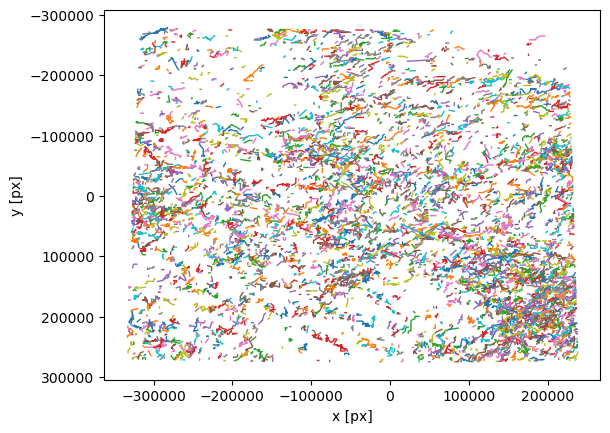

<AxesSubplot: xlabel='x [px]', ylabel='y [px]'>

In [22]:
tp.plot_traj(trajectories_unfiltered, colorby='particle')

In [25]:
trajectories_filtered.to_csv('/data/keeling/a/melinda3/accp/tracking_ots/ot_trajectories_trackpy_filtered6.csv')